In [1]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
from __future__ import print_function
import collections
import math
import numpy as np
import pandas as pd
import os
import csv
from csv import reader
import random
import tensorflow as tf
from gensim.models import word2vec
%matplotlib inline

In [2]:
import os
a = os.getcwd()
print (a)

/home/sungwoo


In [3]:
df=pd.read_csv('/home/sungwoo/Ethnography3.csv'); df[:3]

,Location,Thing
0,songdo,Computer
1,subway_station,iPhone
2,home,laptop


In [4]:
df3 = df.reindex(columns=['Location', 'Thing' ]).dropna(how='any').sort_values('Thing');
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)

In [5]:
with open('sentences.txt' , 'w') as fp:
    for value in df3.values:
        value[0]=value[0].upper()
        value[1]=value[1].upper()
        Location = value[0].replace('' ,'')
        for Thing in value[1].split(' ,'):
            fp.write('%s %s  \n' % (Location,Thing.replace(' ', '')))


In [6]:
sentences = word2vec.Text8Corpus('sentences.txt')

In [7]:
model = word2vec.Word2Vec(sentences, size=100, window=5, min_count=15, workers=5)

INFO : collecting all words and their counts
INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO : collected 492 word types from a corpus of 10638 raw words and 2 sentences
INFO : Loading a fresh vocabulary
INFO : min_count=15 retains 152 unique words (30% of original 492, drops 340)
INFO : min_count=15 leaves 7943 word corpus (74% of original 10638, drops 2695)
INFO : deleting the raw counts dictionary of 492 items
INFO : sample=0.001 downsamples 87 most-common words
INFO : downsampling leaves estimated 3644 word corpus (45.9% of prior 7943)
INFO : estimated required memory for 152 words and 100 dimensions: 197600 bytes
INFO : resetting layer weights
INFO : training model with 5 workers on 152 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
INFO : worker thread finished; awaiting finish of 4 more threads
INFO : worker thread finished; awaiting finish of 3 more threads
INFO : worker thread finished; awaiting finish of 2 more threa

In [8]:
print(model)


Word2Vec(vocab=152, size=100, alpha=0.025)


In [9]:
words = list(model.wv.vocab)
print(words)

['UNIVERSITY', 'INCHEON_TERMINAL', 'CAFETERIA', 'SCHOOL_CAFETERIA', 'WALLET', 'POS_TERMINAL', 'MOVIE', 'SINGING_PRACTICE', 'HAIR_DRYER', 'CELL_PHONE', 'INU_CLUB_ROOM', 'BUS__', 'WALKING', 'PPT', 'BASEBALL_STADIUM', 'BUCHEON_', 'CENTRAL_PARK', 'WINDOW', 'BED', 'BUS_INFORMATION_MACHINE', 'PILLOW', 'HOMEPLUS', 'PART-TIME_JOB', 'SNACK', 'PENCIL,_PAPER', 'SCHOOL', 'RESTROOM', 'MIRROR', 'BILLIARD', 'CLOCK', 'MARKET', 'LIGHT', 'SI-HEUNG', 'GAPYEONG', 'LAPTOP', 'SEOUL', 'EUL-WANG-RI', 'BUS', 'CLASSROOM', 'ON_THE_WAY_TO_BUSAN', 'BUILDING', 'CLOTHES', 'CHURCH', 'AIR_CONDITIONER', 'ROAD', 'CARRIER', 'INU', 'HOUSE', 'ELEVATOR', 'PORK', 'BEVERAGE', 'RESTAURANT', 'KEYBOARD', 'FOOD', 'BEAM_PROJECTOR', 'LECTURE_ROOM', 'FRIENDS', 'TV', 'INHA_UNIVERSITY', 'SHOPPING_CART', 'BUS_STATION', 'BOOK', 'GYM', 'DOMITORY_ROOM', 'BUCHEON', 'ANSAN', 'SPOON', 'CUE_STICK', 'CARTOON_CAFE', 'DINNER', 'DESKTOP', 'BEACH(SAND)', 'DRINKING', 'BUSAN', 'SUBWAY_CHAIR', 'BUS_CARD', 'HAMBURGER', 'CLOTH', 'MOUSE', 'SANG-DONG', '

In [10]:
print(model[['COMPUTER']])

[[ 0.0211339   0.16008852 -0.00401824  0.01138861  0.28886303  0.17957352
   0.08161264 -0.10861339 -0.01038501  0.07702633 -0.15424106 -0.02239709
   0.25826865  0.15882228  0.10407308 -0.12009954  0.38074908 -0.00887793
   0.03101915  0.11724425  0.18662038  0.05020955  0.0354152   0.19682279
  -0.02119616 -0.18961504 -0.11343109 -0.09887444 -0.07549698  0.02464806
  -0.09439984  0.11002416 -0.11478332  0.01203193 -0.21018174  0.09985426
   0.12290116 -0.13955322 -0.11318551  0.13012522  0.02025522 -0.02985606
   0.19050725 -0.06685375 -0.03840948  0.0905688  -0.17958517  0.12307788
  -0.01400661 -0.08496431 -0.24971744  0.11267851 -0.1094979   0.16850159
  -0.19499795 -0.10491035 -0.11218961 -0.00234092  0.05339416  0.23519737
  -0.11063641 -0.08000024  0.13918266  0.25959188 -0.00359773  0.04145925
  -0.01379957  0.04840906  0.18416308 -0.21887074 -0.0636009   0.09291854
  -0.03580412  0.03647167 -0.00895717  0.00056847  0.02083276 -0.33288026
  -0.04064448 -0.10812379 -0.01507295 

In [11]:
model.wv.save_word2vec_format('model.bin')

INFO : storing 152x100 projection weights into model.bin


In [12]:
model.wv.save_word2vec_format('model.txt', binary = False)

INFO : storing 152x100 projection weights into model.txt


In [13]:
import gensim.models.keyedvectors as word2vec
new_model = word2vec.KeyedVectors.load_word2vec_format('model.bin')
print(new_model)

INFO : loading projection weights from model.bin
INFO : loaded (152, 100) matrix from model.bin


Current size: [6.0, 4.0]


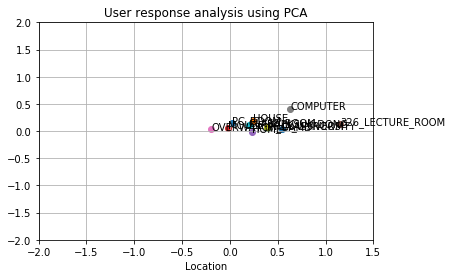

In [14]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.title('User response analysis using PCA')
#pyplot.scatter(result[:,0],result[:,1])
pyplot.xlabel('Location')
fig_size = pyplot.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 20
fig_size[1] = 15
pyplot.rcParams["figure.figsize"] = fig_size
pyplot.ylim(-2,2)
pyplot.xlim(-2,1.5)
words = list(model.wv.vocab)
for i, word in enumerate(words):
    if not word in ['REFRIGERATOR']:
         if word in ['COMPUTER','326_LECTURE_ROOM','HOUSE','PC_ROOM','CLASS_ROOM','BAEKSUK-DONG'
                    ,'INHA_UNIVERSITY','HOME','CLASSROOM','OVERWATCH_GAME','MOUSE']:
            pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
            pyplot.scatter(result[i,0],result[i,1])
pyplot.grid(True)
pyplot.show()

In [15]:
model.most_similar(positive=['COMPUTER'])

INFO : precomputing L2-norms of word weight vectors


[('326_LECTURE_ROOM', 0.9808163642883301),
 ('HOUSE', 0.9695262908935547),
 ('PC_ROOM', 0.9570291042327881),
 ('CLASS_ROOM', 0.9539010524749756),
 ('BAEKSUK-DONG', 0.9459470510482788),
 ('INHA_UNIVERSITY', 0.9420482516288757),
 ('MOUSE', 0.9364089965820312),
 ('OVERWATCH_GAME', 0.9349728226661682),
 ('AIR_CONDITIONER', 0.9330059885978699),
 ('CLEANING_MACHINE', 0.9328169822692871)]

In [16]:
model.similarity('RESTAURANT','LAPTOP')

0.91825392549002083

In [17]:
model.similarity('INCHEON_TERMINAL','SUBWAY_STATION')

0.9977427296403315

In [18]:
model.most_similar(positive=['RESTAURANT','INU'],negative=['CAFE'],topn=2)

[('SCHOOL_CAFETERIA', 0.9962369203567505), ('UNIVERSITY', 0.995794951915741)]